In [1]:
# import pytorch
import torch

### Creating Tensors

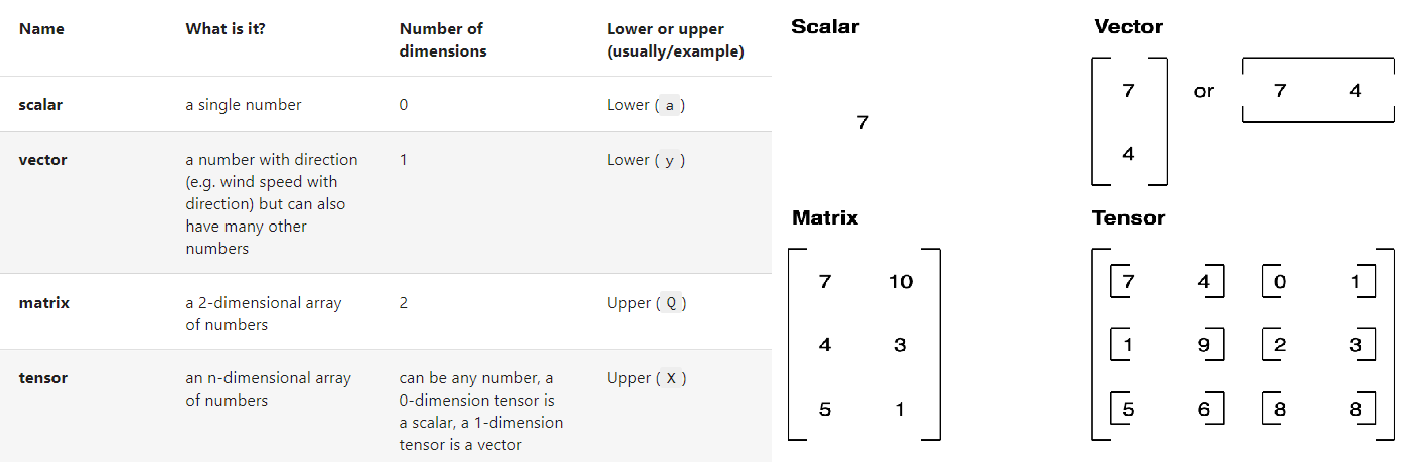

PyTorch runs on data manipulation that is stored on whats called as tensors.

Tensors are more generalized versions of matrix that can store multiple dimensions. Or more practically speaking store numbers that represent virtually anything
- e.g. a tensor with the shape [3, 244, 244] to represent an image that could represent [color_channels, height, width]. This would have three dimensions, one for each element

A simple tensor can be created with a zero dimension tensor called a scalar which is as follows

In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

Notice how the type is of a `tensor()`. The dimension can be checked with the following code

In [3]:
scalar.ndim

0

To retrieve from tensor to integer use this (ONLY WORKS FOR SCALARS)

In [4]:
scalar.item()

7

A vector is a single dimension tensor. It's like a single array or set and can store multiple elements

In [5]:
vector = torch.tensor([2, 3])
vector, vector.ndim

(tensor([2, 3]), 1)

Notice that it is a single dimension despite it having two elements

A quick and easy way to count the amount of dimensions a tensor has is to count the amount of square brackets `[` it has at the beginning. So in this case, it's only one so it's only one dimension

Another important descriptor for tensors are its shape

In [6]:
vector.shape

torch.Size([2])

It says 2 because there are two elements in the vector

Next is a matrix which is two dimensional (count the amount of `[`)

Notice how it is all in capitals. It is standard practice to denote names of scalars and vectors with only lowercase. Whilst anything with higher dimensions have its name all capitalized.

In [7]:
MATRIX = torch.tensor([[3, 4, 8], 
                       [5, 7, 1]])
MATRIX, MATRIX.ndim, MATRIX.shape

(tensor([[3, 4, 8],
         [5, 7, 1]]),
 2,
 torch.Size([2, 3]))

As predicted, the tensor is of 2 dimensions and has size [2, 3]. This size means that the matrix has 2 rows and 3 columns. 

How about something that has greater dimensions than a matrix? A tensor. It can represent virtually anything in an excel spreadsheet or beyond. That's why any data can be digested within a machine learning model as tensors are what's being processed.

In [10]:
TENSOR = torch.tensor([[[1, 2, 3], 
                        [4, 5, 6]]])

TENSOR, TENSOR.ndim, TENSOR.shape

(tensor([[[1, 2, 3],
          [4, 5, 6]]]),
 3,
 torch.Size([1, 2, 3]))

The dimension is 3 as there are 3 `[`.

It's size can be explained as it is order from it's outer list to its inner list.
- In the first outer list, there is only 1 element which is the middle list hence it is of size 1
- In the middle list, there are two inner lists
- In the inner list, there three elements which are numbers

Combine all three and you get the size of [1, 2, 3] in that order

### Random Tensors

Creating a tensor manually is rare when used in actual machine learning model. Often time the tensors are randomly generated which then are adjusted automatically by the model.

Tensors that have random elements can be created with a seperate function.

In [13]:
random = torch.rand(size=(3, 4)) # a matrix with 3 rows and 4 columns
random, random.dtype

(tensor([[0.8055, 0.7575, 0.1775, 0.7850],
         [0.8209, 0.2934, 0.0355, 0.9637],
         [0.3112, 0.8228, 0.9176, 0.4510]]),
 torch.float32)

As you can see the tensors generate random real numbers that are from 0-1

That function is quite flexibile as it can create any tensor of any size or shape

### Zeros, Ones and Alike Tensors

Tensors with only ones and zeros are used in masking values. This is to inform the model to now learn the masked values.

In [16]:
# tensor of all zeros
zeros = torch.zeros(size=(4, 5))
zeros

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [17]:
# tensor of all ones
zeros = torch.ones(size=(4, 5))
zeros

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In masking, it is usual to have the ones and zeros in the same shape as the tensor that you want to mask. This can be done by the following function for ones and zeros

In [24]:
MATRIX_ZEROS = torch.zeros_like(input=MATRIX)
MATRIX_ZEROS

tensor([[0, 0, 0],
        [0, 0, 0]])

In [25]:
TENSOR_ONES = torch.ones_like(input=TENSOR)
TENSOR_ONES

tensor([[[1, 1, 1],
         [1, 1, 1]]])

### Ranged Tensors

Tensors of a specific range with some steps can be made with `torch.arange(start, end, step)`
where:
- `start` is the first element of the tensor
- `end` is until what value `step` stops at (usually not in the generated tensor)
- `step` is how much is added to the `start` and so on until it reaches `end` (doesn't need to be perfectly divisible)

In [22]:
ranged = torch.arange(3, 93, 3) # creates a ranged vector
ranged

tensor([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54,
        57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90])

### Tensor Datatypes

There are many different datatypes in PyTorch (see: https://pytorch.org/docs/stable/tensors.html#data-types)

Some are for CPU computation and others for GPU computation. Typically the ones with `torch.cuda` is for GPU

The most common datatype is `torch.float32` (32-bit floating point) or `torch.float` for non-integers. For integers it is `torch.int64`

There are other datatypes that offer less or more precision such as `torch.float16` or `torch.half` and `torch.float64` or `torch.double`

More precision means more computing needed however which can slow down the computation. So that's why `torch.float` is the preferred one as it balances both precision and computing time

In [27]:
# default tensor with datatype torch.float32
default_tensor = torch.tensor([3.3, 5.5, 6.6],
                              dtype = None, # default parameter
                              device = None, # default parameter
                              requires_grad = False # default. if true, every operation performed in this tensor is recorded
                              )

default_tensor, default_tensor.dtype, default_tensor.device

(tensor([3.3000, 5.5000, 6.6000]), torch.float32, device(type='cpu'))

A common issue when using PyTorch when it comes to tensors is different datatypes and device issues which can be checked like above. To solve it just make sure to convert a tensor's datatype and device the same as the other

In [30]:
float_16_tensor = default_tensor.type(torch.float16)

float_16_tensor, float_16_tensor.dtype

(tensor([3.3008, 5.5000, 6.6016], dtype=torch.float16), torch.float16)

### Getting Information from Tensors

As seen above, tensors have several variables that can be printed to see what type of tensor it is
- `tensor.ndim`: dimensions
- `tensor.shape`: shape from outer list to inner list (e.g. how many elements per row)
- `tensor.dtype`: data type used by tensor
- `tensor.device`: device used (gpu, cuda, cpu)

In [32]:
# create random tensor to see its info
random = torch.rand(size=(3, 6))

random.ndim, random.shape, random.dtype, random.device

(2, torch.Size([3, 6]), torch.float32, device(type='cpu'))

Most errors from tensors are often from mismatches of these variables. Which are easily replacable to match again.

### Tensor Operations

What a machine learning model does from input to output is really just a bunch of operations on tensors; which are the following:
- addition
- subtraction
- multiplication (per element)
- division
- matrix multiplication (most important)

Adding, subtracting, multiplying and dividing a tensor by a scalar just adds all elements in the tensor by whatever value is added

In [35]:
tensor = torch.tensor([2, 3, 6, 7])
tensor + 10

tensor([12, 13, 16, 17])

In [36]:
tensor - 5

tensor([-3, -2,  1,  2])

In [38]:
tensor * 3

tensor([ 6,  9, 18, 21])

In [39]:
tensor / 4

tensor([0.5000, 0.7500, 1.5000, 1.7500])

PyTorch also offers a built-in multiplication and addition functions for tensors but directly calculating the tensor like above is recommended

In [41]:
torch.mul(tensor, 8)

tensor([16, 24, 48, 56])

In [45]:
torch.add(tensor, 6)

tensor([ 8,  9, 12, 13])

Matrix multiplication is the most powerful operation and is basically what makes a machine learning model work.

However there are some rules to obey when doing `torch.matmul()` regarding tensor shapes:

The amount of columns in the first matrix must always be the same as the amount of rows in the second column

Consider the tensors of shape (3, 4) and (4, 3) denoting a matrix:
- (3, 4) and (3, 4) will not work because 4 columns do not match with 3 rows
- (3, 4) and (4, 3) will work because 4 columns match with 4 rows

The shape of the resultant matrix can also be determiend by the shape of the two multiplied matrices; just look at the most left and right numbers:
- (3, 5) and (5, 2) will create a (3, 2) shape matrix
- (5, 3) and (3, 7) will create a (5, 7) shape matrix
- (a, b) and (b, c) will create a (a, c) shape matrix

To multiply a matrix with itself, it is necessary to multiply the original matrix with the transpose of the matrix to obey the mentioned rule. Though this is automatically done in `torch.matmul()`

In [46]:
tensor = torch.tensor([3, 6, 9])

tensor * tensor # element-wise

tensor([ 9, 36, 81])

In [47]:
torch.matmul(tensor, tensor) # matrix multiplication

tensor(126)

Matrix multiplication with tensors can be done by hand but will take a longer time. `torch.matmul()` is optimized to reduce time taken

### A Common Error: Shape Errors

Since machine learning uses matrix multiplication a lot of times. It is also common for some tensors to have shape errors. Hence why it is important to know how to fix shapes by transposing

In [60]:
tensor1 = torch.tensor([[1, 2, 3],
                        [4, 5, 6]])
tensor2 = torch.tensor([[7, 8, 9],
                        [10, 11, 12]])

torch.matmul(tensor1, tensor2) # this will error because shape (2, 3) cannot multiply with shape (2, 3)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)

There are two ways to fix this using transpose with two functions:
- `torch.transpose(input, dim0, dim1)` where `input` is the tensor, and (dim0, dim1) is the desired shape (flexible transpose)
- `tensor.T` is a direct transpose of flipping the shape elements with one another

In [61]:
# transpose matrix with .T
tensor2 = tensor2.T
tensor2

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [63]:
# then we can multiply with tensor1 (torch.mm is short for torch.matmul)
torch.mm(tensor1, tensor2)

tensor([[ 50,  68],
        [122, 167]])

Like mentioned, machine learning models utilize matrix multiplication and dot products all the time. For example in a basic linear layer: $$y=W\cdot X^T+b$$

where:
- y is the predicted output
- W is a vector that contains all the weights of the layer
- X is a vector that contains all the input. $X^T$ means that it is transposed
- b is the bias value to adjust offsets from $W\cdot X$ 

This is created in PyTorch using `torch.nn.Linear()` which essentially forms a linear function $y=mx+b$

In [65]:
# set a seed so random values are reproducible
torch.manual_seed(42)

linear = torch.nn.Linear(in_features=2, # the input for this layer must have 2 columns
                         out_features=6) # think of this as shape (2, 6)

x = torch.tensor([[3, 5],
                  [1, 3],
                  [7, 9]], dtype=torch.float32) # remember to set to torch.float32
y = linear(x)

y, y.shape

(tensor([[ 5.0788,  2.8466,  0.5896,  0.9437, -0.1786,  2.6101],
         [ 2.8237,  1.8788,  0.6141,  0.8017, -0.3878,  1.1162],
         [ 9.5888,  4.7822,  0.5406,  1.2278,  0.2397,  5.5979]],
        grad_fn=<AddmmBackward0>),
 torch.Size([3, 6]))

So the inputted tensor has shape (3, 2) and the linear layer has shape (2, 6) which obeys the matrix multiplication rule. This then results in a matrix of shape (3, 6)

### Basic Tensor Statistics